<a href="https://colab.research.google.com/github/ilyayath/olist-analysis/blob/main/AB_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/content/df.csv')

Нульова гіпотеза (H₀):
Середня сума замовлення для користувачів з високими відгуками (score ≥ 4) не відрізняється від суми замовлення користувачів з низькими відгуками (score ≤ 2).

    H₀: μ₁ = μ₂

Альтернативна гіпотеза (H₁):
Середня сума замовлення для користувачів з високими відгуками відрізняється (більша або менша) від суми користувачів з низькими відгуками.

    H₁: μ₁ ≠ μ₂

- Метрика: `payment_value`
- Групи: review_score ≥ 4 vs review_score ≤ 2
- Візуалізація: boxplot
- Статистичний тест: Mann–Whitney U-test (через ненормальний розподіл)
- Рівень значущості: α = 0.05

In [3]:
A = df[df['review_score'] >= 4]['payment_value']
B = df[df['review_score'] <= 2]['payment_value']

In [4]:
A = pd.to_numeric(A, errors='coerce').dropna()
B = pd.to_numeric(B, errors='coerce').dropna()

In [5]:
mn, p_value = stats.mannwhitneyu(A, B, alternative='two-sided')

In [18]:
print(f"Середній чек (A): {A.mean():.2f}")
print(f"Середній чек (B): {B.mean():.2f}")
print(f"P-value: {p_value:.300f}")

Середній чек (A): 161.46
Середній чек (B): 223.06
P-value: 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000018429403862406079501503132329028946110167756919922060011741076482471035823331768223740205891516


In [7]:
if p_value < 0.05:
    print("Різниця статистично значуща — середні чеки різні.")
else:
    print("Немає статистично значущої різниці між середніми чеками.")

Різниця статистично значуща — середні чеки різні.


In [8]:
df_box = df[df['review_score'].isin([1.0,2.0,4.0,5.0])]
df_box['group'] = df_box['review_score'].apply(lambda x: 'High(5-4)' if x >= 4 else 'Low(1-2)' )

/tmp/ipython-input-108484000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box['group'] = df_box['review_score'].apply(lambda x: 'High(5-4)' if x >= 4 else 'Low(1-2)' )


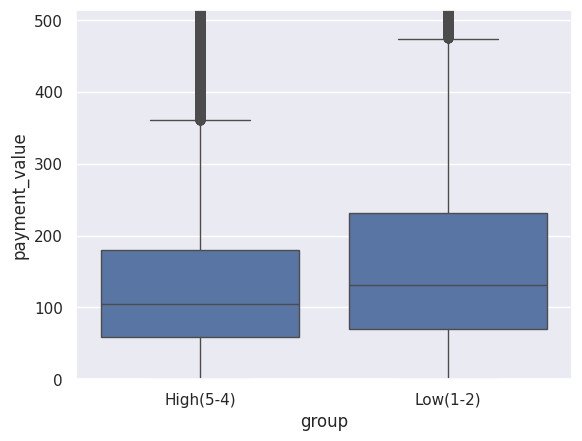

In [9]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=df_box['group'],y=df_box['payment_value'])
plt.ylim(0, df_box['payment_value'].quantile(0.95))
plt.show()

Нульова гіпотеза (H₀): Середня сума замовлення в регіоні SP така ж, як у регіоні RJ

    H₀: μ_SP = μ_RJ

Альтернативна гіпотеза (H₁): Середня сума замовлення у регіоні SP відрізняється від середньої суми замовлення в RJ

    H₁: μ_SP ≠ μ_RJ


- Метрика: payment_value

- Групи: SP та RJ

- Візуалізація: boxplot

- Статистичний тест: Mann–Whitney U-test (через ненормальний розподіл)

- Рівень значущості: α = 0.05


In [10]:
A1 = df[df['customer_state'] == 'SP']['payment_value']
B1 = df[df['customer_state'] == 'RJ']['payment_value']

In [11]:
A1 = pd.to_numeric(A1, errors='coerce').dropna()
B1 = pd.to_numeric(B1, errors='coerce').dropna()

In [12]:
mn1, p_value1 = stats.mannwhitneyu(A1, B1, alternative='two-sided')

In [13]:
print(f"Середній чек (A1): {A1.mean():.2f}")
print(f"Середній чек (B1): {B1.mean():.2f}")
print(f"P-value: {p_value1:.100f}")

Середній чек (A1): 153.72
Середній чек (B1): 180.15
P-value: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000203628839206597639


In [14]:
if p_value1 < 0.05:
    print("Різниця статистично значуща — середня сума замовлень різна.")
else:
    print("Немає статистично значущої різниці між середніми сумами замовлень.")

Різниця статистично значуща — середня сума замовлень різна.


In [15]:
df_box1 = df[df['customer_state'].isin(['SP','RJ'])]

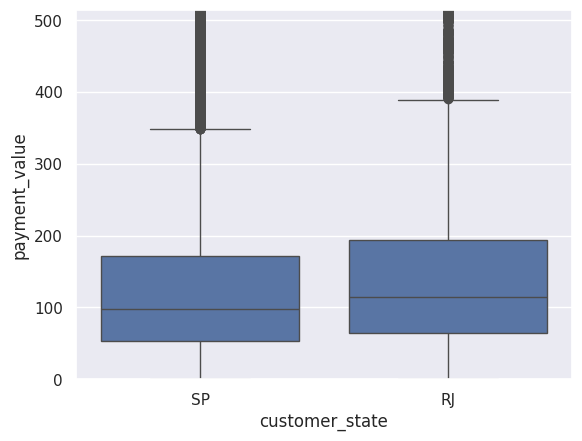

In [16]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=df_box1['customer_state'],y=df_box1['payment_value'])
plt.ylim(0, df_box['payment_value'].quantile(0.95))
plt.show()